<h2>Split train and test data</h2>
<ul>
    <li>Rank data based on price</li>
    <li>Get same amount of data from each group to make test data</li>
</ul>
<h5><b>NOTE:</b> csv file change maually and price column moved to the last column</h5>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data
df = pd.read_csv('.\\car_details_v4.csv')

# Split features and lables (prices)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Define a range and rank data based on their prices
min_price = y.min()
max_price = y.max()
step = (max_price - min_price) / 3
ranks = []

# Make 3 ranges and rank data based on their price's ranks
for i in range(3):
    ranks.append(range(int(min_price + i*step - 100), int(min_price + (i+1)*step) + 100))
temp = []
for index, row in df.iterrows():
    for j in range(len(ranks)):
        if row['Price'] in ranks[j]:
            temp.append(j)

# Add this column to data frame
df['rank'] = temp

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['rank'])


<h2>Show some features</h2>
<ul>
    <li>Price</li>
    <li>Sitting Capisity</li>
    <li>Year</li>
    <li>Height</li>
    <li>Lenght</li>
    <li>Width</li>
</ul>

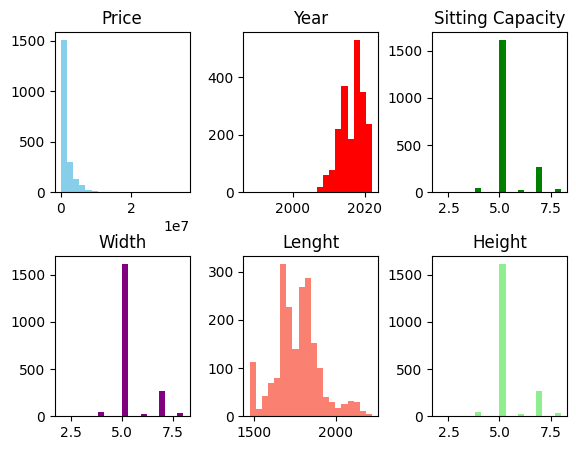

In [3]:
prices = y.values
years = df['Year'].values
siting = df['Seating Capacity'].values
widths = df['Width'].values
heights = df['Height'].values
lenghts = df['Length'].values

# Prices
plt.subplot(2, 3, 1)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
prices_hist = plt.hist(prices, bins=20, color='skyblue')
plt.title("Price")

# Years
plt.subplot(2, 3, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
years_hist = plt.hist(years, bins=20, color='red')
plt.title("Year")

# Sitting Capacity
plt.subplot(2, 3, 3)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='green')
plt.title("Sitting Capacity")

# Widths
plt.subplot(2, 3, 4)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='purple')
plt.title("Width")

# Lenghts
plt.subplot(2, 3, 5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(widths, bins=20, color='salmon')
plt.title("Lenght")

# Heights
plt.subplot(2, 3, 6)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='lightgreen')
plt.title("Height")

plt.show()

<h2>Missing Values</h2>
<h4>Statistics (Before Handling)</h4>

In [4]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Price                   0
rank                    0
dtype: int64


<h2>Missing Values</h2>
<h4>Diagram (Before Handling)</h4>

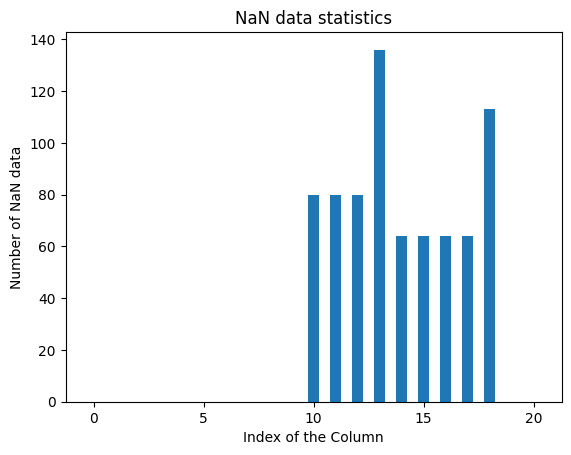

In [36]:
nan_list = df.isnull().sum().values
plt.bar([i for i in range(len(df.columns))], nan_list, width=0.5, align='center')
plt.xlabel("Index of the Column")
plt.ylabel("Number of NaN data")
plt.title("NaN data statistics")
plt.show()

<h2>Missing Values</h2>
<h4>Handling numeric and non-numeric missing values</h4>
<h5>Numeric Values</h5>
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>height</li>
    <li>Fuel Tank Capacity</li>
    <li>Sitting Capacity</li>
    <li>Engine</li>
    <li>Max Power</li>
    <li>Max Torque</li>
</ul>
<h5>Non-Numeric Values</h5>
<ul>
    <li>Drivetrain</li>
</ul>
<h4><b>NOTE:</b> Selected method is to replace missing values with the mean of rest data</h4>

In [37]:
# Numeric Values
# Length
df['Length'] = df['Length'].fillna(df['Length'].mean())

# Width
df['Width'] = df['Width'].fillna(df['Width'].mean())

# Height
df['Height'] = df['Height'].fillna(df['Height'].mean())

# Fuel Tank Capacity
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean())

# Seating Capacity
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].mean())

# Engine
import copy
df_copy = copy.deepcopy(df)
engines = list(df_copy['Engine'].values)

for i in range(len(engines)):
    if type(engines[i]) == str:
        c_index = engines[i].find('c')
        engines[i] = int(engines[i][:c_index])

df_copy['Engine'] = np.array(engines)
df_copy['Engine'] = df_copy['Engine'].fillna(df_copy['Engine'].mean())

# Max Power
max_powers = copy.deepcopy(df_copy['Max Power'].values)
df_copy['Max Power'] = df_copy['Max Power'].fillna(np.random.choice(max_powers, size=1)[0])

# Max Torque
max_powers = copy.deepcopy(df_copy['Max Torque'].values)
df_copy['Max Torque'] = df_copy['Max Torque'].fillna(np.random.choice(max_powers, size=1)[0])

# Non-numeric Values
# Drivetrain
drivetrains = copy.deepcopy(df_copy['Drivetrain'].values)
df_copy['Drivetrain'] = df_copy['Drivetrain'].fillna(np.random.choice(drivetrains, size=1)[0])

# Set df again
# Worked with the copy version of df to do not change main data set
df = copy.deepcopy(df_copy)

<h2>Missing Values</h2>
<h4>Statistics (After Handling)</h4>

In [38]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Max Power               0
Max Torque              0
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
Price                   0
rank                    0
dtype: int64


<h2>Encoding categorical data</h2>
<ul>
    <li>Model</li>
    <li>Make</li>
    <li>Fuel Type</li>
    <li>Transmission</li>
    <li>Location</li>
    <li>Color</li>
    <li>Owner</li>
    <li>Seller Type</li>
    <li>Drivetrain</li>
</ul>

In [48]:
label_encoder = LabelEncoder()
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Owner'] = label_encoder.fit_transform(df['Owner'])
df['Seller Type'] = label_encoder.fit_transform(df['Seller Type'])
df['Drivetrain'] = label_encoder.fit_transform(df['Drivetrain'])


<h2>Encoding semi-categorical data</h2>
<ul>
    <li>Max Power</li>
    <li>Max Torque</li>
</ul>